In [39]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [40]:
# read data from Data+_2025/data/enrollment_projections/sgr_table_region_2324_20240710.xlsx in Google Drive
'''
read in SGR data -- file paths: 
Leah: /Users/leahwallihan/Durham_school_planning/sgr_htype_region.xlsx
'''
sgr_data = pd.read_excel(r'/Users/leahwallihan/Durham_school_planning/sgr_htype_region.xlsx')

In [41]:
# remove null values and shorten to only use relevant columns
sgr_data = sgr_data.dropna()
sgr_data.rename(columns={'sgr_dps_2324_all.1': 'sgr_dps_avg_k12'}, inplace=True) # because there might be a typo in the file?
sgr_data = sgr_data[['housing_type','region','sgr_dps_avg_k12']]
sgr_data['sgr_dps_avg_k12'] = sgr_data['sgr_dps_avg_k12'].round(4)
sgr_data.set_index(['region', 'housing_type'], inplace=True)

In [42]:
'''
read in shapefile to get geometries for HS regions from Data+_2025/QGIS/DPS shapefiles from layers in Google Drive -- file paths: 
Leah: /Users/leahwallihan/Durham_school_planning/geospatial files/HS_regions
'''
regions = gpd.read_file(r'/Users/leahwallihan/Durham_school_planning/geospatial files/HS_regions')[['region', 'geometry']]
regions = regions.to_crs('EPSG:4326')
#read in geojson with residential developments
''' 
read in geojson with residential developments -- file paths: 
Leah: /Users/leahwallihan/Durham_school_planning/DPS-Planning/GIS_files/resdev_cases.geojson'''
res_dev = gpd.read_file(r'/Users/leahwallihan/Durham_school_planning/DPS-Planning/GIS_files/resdev_cases.geojson')
res_dev = res_dev.to_crs('EPSG:4326')

In [43]:
res_dev

,A_NUMBER,A_TYPE,A_DATE,A_STATUS,A_STATUS_D,A_PROJECT_,A_DESCRIPT,A_USER_ID,A_CASE_PLA,StatCode,...,Editor,match_results,sf_detached,sf_attached,duplex/triplex,multifamily,condo,region,pu,geometry
0,D2000291,PL_MINSP,2020-12-02,APP,2021-09-03,Umstead Grove Conservation Subdivision,"50 Single - family lots, 1 stormwater pond, ad...",JESSICADO,COURTNEYMC,APP,...,gisproc_sys,"[(50, None, 'single family', 'lots')]",50,0,0,0,0,North,663.0,POINT (-78.94561 36.07501)
1,D2200173,PL_MINSP,2022-05-25,APP,2023-02-01,Pineview Glen Town homes - Mass Grading,Mass grading only site plan for residential to...,JUSTINH,KEAGANSA,APP,...,gisproc_sys,[ ],0,0,0,0,0,East,249.0,POINT (-78.81051 35.92776)
2,D1800378,PL_MINSP,2018-11-28,APP,2020-04-14,Elan Innovation District,Mixe of uses including retail and residential....,JOHNRA,TREYFI,APP,...,gisproc_sys,[ ],0,0,0,0,0,Central,819.0,POINT (-78.90421 35.99991)
3,D2100156,PL_MINSP,2021-06-04,APP,2022-02-02,ALTA Rutherford,Multifamily Apartments,KIMRO,TREYFI,APP,...,gisproc_sys,[ ],0,0,0,0,0,Central,802.0,POINT (-78.92991 36.01005)
4,D1900171,PL_MINSP,2019-05-30,APP,2020-04-03,Ellis Road Phase 3,"37 Townhome units, 102 Attached S-F units (cal...",ROBINSH,COLERE,APP,...,gisproc_sys,"[(37, None, 'townhouse', 'units'), (102, None,...",248,37,0,0,0,East,132.0,POINT (-78.86167 35.9519)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,D2500072,PL_MINSP,2025-03-18,UN_RE,2025-03-18,Leigh Valley,Apartment development to include 324 units.,MICHAELMA,TREYFI,UN_RE,...,gisproc_sys,"[(324, None, 'apartment', 'units')]",0,0,0,324,0,Southwest,814.0,POINT (-78.99141 35.91899)
266,D2500088,PL_MINSP,2025-04-01,UN_RE,2025-04-01,Cornwallis Townhomes,Create 33 townhome site.,EARLENETHO,JALISAHA,UN_RE,...,gisproc_sys,"[(33, None, 'townhouse', None)]",0,33,0,0,0,Southeast,515.0,POINT (-78.8931 35.93767)
267,D2500095,PL_MINSP,2025-04-17,UN_RE,2025-04-17,4702 Farrington Rd - Grading Only,Grading only site plan for future residential ...,NKOST,PEYTONBL,UN_RE,...,gisproc_sys,[ ],0,0,0,0,0,Southwest,649.0,POINT (-78.99077 35.93368)
268,D2500103,PL_MINSP,2025-04-25,UN_RE,2025-04-25,Fayetteville Road MultiFamily,Phase one of overall development - single fami...,FRANCISCOM,TREYFI,UN_RE,...,gisproc_sys,"[(88, None, 'single family', 'units')]",88,0,0,0,0,Southeast,256.0,POINT (-78.94976 35.87877)


In [44]:
res_dev.to_csv('res_dev_csv')

In [45]:
# function to count number of students in each row
def count_students(row): 
        
    htype_map = {
        'sf_detached': 'sf_detach',
        'sf_attached': 'sf_attach',
        'duplex/triplex': 'du_tri',
        'multifamily': 'mf_apt',
        'condo': 'condo'
    }

    region = row['region']

    total = 0
    for col_name, sgr_col in htype_map.items():
        count = row.get(col_name, 0)

        try:
            multiplier = sgr_data.loc[(region, sgr_col), 'sgr_dps_avg_k12']
        except KeyError:
            multiplier = 0

        total += count * multiplier

    return total

In [46]:
res_dev['student_gen'] = res_dev.apply(count_students, axis=1)

In [47]:
res_dev[['region', 'sf_detached', 'sf_attached', 'multifamily', 'student_gen']]

,region,sf_detached,sf_attached,multifamily,student_gen
0,North,50,0,0,13.4350
1,East,0,0,0,0.0000
2,Central,0,0,0,0.0000
3,Central,0,0,0,0.0000
4,East,248,37,0,56.7421
...,...,...,...,...,...
265,Southwest,0,0,324,60.6852
266,Southeast,0,33,0,1.9404
267,Southwest,0,0,0,0.0000
268,Southeast,88,0,0,18.9200


In [48]:
# gets counts for each region
region_gen = res_dev.groupby('region')['student_gen'].sum()
regions.set_index('region', inplace=True)
regions['student_gen'] = region_gen

In [49]:
#regions.to_file('region_gen.geojson', driver='GeoJSON')

In [50]:
#res_dev.to_file('resdev_with_stu_proj.geojson', driver='GeoJSON')

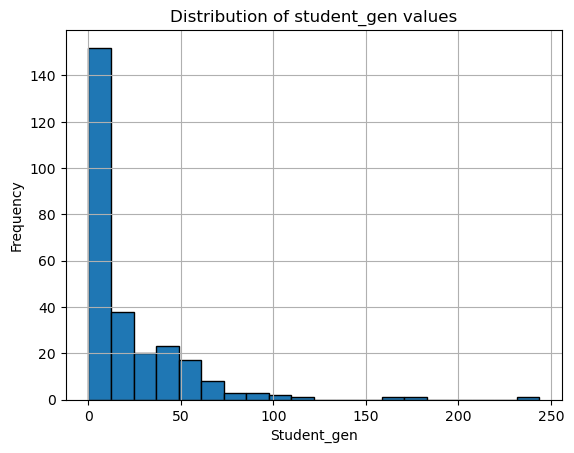

In [51]:
res_dev["student_gen"].plot.hist(bins=20, edgecolor='black')

plt.xlabel("Student_gen")
plt.ylabel("Frequency")
plt.title("Distribution of student_gen values")
plt.grid(True)

plt.show()

In [52]:
# read in planning unit shapefile 
pu = gpd.read_file('/Users/leahwallihan/Durham_school_planning/geospatial files/pu_shape.geojson')[['OBJECTID', 'geometry']]
pu = pu.to_crs('EPSG:4326')

In [53]:
# fill missing values
res_dev['pu'] = res_dev['pu'].fillna(0).astype(int)

# get counts for each planning unit
pu_gen = res_dev.groupby('pu')['student_gen'].sum()

In [54]:
pu['student_gen'] = pu['OBJECTID'].map(pu_gen).fillna(0).round().astype(int)

In [55]:
# let's fix hs_full_geo
pu = pu.set_index('OBJECTID')

hs_full_geo = gpd.read_file('/Users/leahwallihan/Durham_school_planning/DPS-Planning/GIS_files/hs_full_geo.geojson')
hs_full_geo = hs_full_geo.set_index('pu_2324_84')

for i, row in pu.iterrows():
    hs_full_geo.loc[i, 'student_gen'] = row['student_gen']

# hs_full_geo.to_file('hs_full_geo.geojson', driver='GeoJSON')

In [56]:
pu.to_file('pu_gen.geojson', driver='GeoJSON')

In [76]:
res_dev.head(30)

,A_NUMBER,A_TYPE,A_DATE,A_STATUS,A_STATUS_D,A_PROJECT_,A_DESCRIPT,A_USER_ID,A_CASE_PLA,StatCode,...,match_results,sf_detached,sf_attached,duplex/triplex,multifamily,condo,region,pu,geometry,student_gen
0,D2000291,PL_MINSP,2020-12-02,APP,2021-09-03,Umstead Grove Conservation Subdivision,"50 Single - family lots, 1 stormwater pond, ad...",JESSICADO,COURTNEYMC,APP,...,"[(50, None, 'single family', 'lots')]",50,0,0,0,0,North,663,POINT (-78.94561 36.07501),13.4350
1,D2200173,PL_MINSP,2022-05-25,APP,2023-02-01,Pineview Glen Town homes - Mass Grading,Mass grading only site plan for residential to...,JUSTINH,KEAGANSA,APP,...,[ ],0,0,0,0,0,East,249,POINT (-78.81051 35.92776),0.0000
2,D1800378,PL_MINSP,2018-11-28,APP,2020-04-14,Elan Innovation District,Mixe of uses including retail and residential....,JOHNRA,TREYFI,APP,...,[ ],0,0,0,0,0,Central,819,POINT (-78.90421 35.99991),0.0000
3,D2100156,PL_MINSP,2021-06-04,APP,2022-02-02,ALTA Rutherford,Multifamily Apartments,KIMRO,TREYFI,APP,...,[ ],0,0,0,0,0,Central,802,POINT (-78.92991 36.01005),0.0000
4,D1900171,PL_MINSP,2019-05-30,APP,2020-04-03,Ellis Road Phase 3,"37 Townhome units, 102 Attached S-F units (cal...",ROBINSH,COLERE,APP,...,"[(37, None, 'townhouse', 'units'), (102, None,...",248,37,0,0,0,East,132,POINT (-78.86167 35.9519),56.7421
5,A1900003,PL_CPAA,2019-02-14,COM,2020-08-17,Cole Property,"From Rural Density Residential (RDR, 0.5DU/acr...",DCULTRA,EMILYST,COM,...,[ ],0,0,0,0,0,East,682,POINT (-78.77719 35.98944),0.0000
6,D2200181,PL_MINSP,2022-06-07,APP,2023-05-16,GTH Owner LLC,33 new town home lots with garages and mail ki...,COLERE,COLERE,APP,...,"[(33, None, 'townhouse', 'lots')]",0,33,0,0,0,Central,374,POINT (-78.89255 36.00264),1.0890
7,D2300150,PL_MINSP,2023-06-07,APP,2024-10-22,Hope Crossing II,32 single family units on small lots and 23 to...,TREYFI,TREYFI,APP,...,"[(32, None, 'single family', 'units'), (23, No...",32,23,0,0,0,East,470,POINT (-78.84504 35.99883),8.5919
8,D1900363,PL_MINSP,2019-10-09,APP,2021-07-21,Olive Branch West,"108 Single - Family lots, 2 stormwater ponds, ...",LROBERTSON,COLERE,APP,...,"[(108, None, 'single family', 'lots')]",108,0,0,0,0,East,468,POINT (-78.78659 35.96371),23.5872
9,D2100205,PL_MINSP,2021-07-15,APP,2021-11-29,The Village at Ellis Crossing,"397,000 Total SF: Apartments (264 units), Acce...",KIMRO,ROBINSH,APP,...,"[(264, None, 'apartment', 'units')]",0,0,0,264,0,East,700,POINT (-78.85819 35.94202),56.8656
